# Crimes in Boston

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [47]:
df = pd.read_excel("crime.xlsx")
df.shape

(128943, 17)

### Exploratory Data Analysis

In [48]:
df.head(2)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128943 entries, 0 to 128942
Data columns (total 17 columns):
INCIDENT_NUMBER        128943 non-null object
OFFENSE_CODE           128943 non-null int64
OFFENSE_CODE_GROUP     128943 non-null object
OFFENSE_DESCRIPTION    128943 non-null object
DISTRICT               127937 non-null object
REPORTING_AREA         128943 non-null object
SHOOTING               438 non-null object
OCCURRED_ON_DATE       128943 non-null datetime64[ns]
YEAR                   128943 non-null int64
MONTH                  128943 non-null int64
DAY_OF_WEEK            128943 non-null object
HOUR                   128943 non-null int64
UCR_PART               128906 non-null object
STREET                 126581 non-null object
Lat                    120431 non-null float64
Long                   120431 non-null float64
Location               128943 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 16.7+ MB


In [50]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,128943.000000,128943.000000,128943.000000,128943.000000,120431.000000,120431.000000
mean,2355.281217,2017.506573,6.652505,13.101603,42.175408,-70.845625
std,1177.543769,0.504698,2.989632,6.285563,2.517510,4.072400
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1102.000000,2017.000000,5.000000,9.000000,42.296916,-71.097466
50%,3006.000000,2018.000000,7.000000,14.000000,42.325610,-71.077665
75%,3201.000000,2018.000000,9.000000,18.000000,42.348624,-71.062497
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


In [51]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [52]:
df['Lat'].fillna(value = 0, inplace = True)
df['Long'].fillna(value = 0, inplace = True)

In [53]:
df['UCR_PART'].value_counts()

Part Three    66788
Part Two      37923
Part One      23660
Other           535
Name: UCR_PART, dtype: int64

In [54]:
df['UCR_PART'].unique()

array(['Part One', 'Part Two', 'Part Three', 'Other', nan], dtype=object)

In [55]:
df['UCR_PART'].fillna(value = "NaN", inplace = True)

In [56]:
ucr = df.groupby("UCR_PART")

In [57]:
df[df['UCR_PART'] == 'NaN']['OFFENSE_CODE'].unique()

array([2010, 3115, 1610], dtype=int64)

as we can see that df['UCR_PART'] has 3 values in column OFFENSE_CODE.
Hence we will now check visa-versa for these 3 values in column OFFENSE_CODE, what value it has in column UCR_PART

In [58]:
df[df['OFFENSE_CODE'] == 2010]['UCR_PART'].unique()

array(['NaN'], dtype=object)

In [59]:
df[df['OFFENSE_CODE'] == 3115]['UCR_PART'].unique()

array(['Part Three', 'NaN'], dtype=object)

In [60]:
df[df['OFFENSE_CODE'] == 1610]['UCR_PART'].unique()

array(['NaN'], dtype=object)

as we can see only Part Three for above 3 values so we are imputing that value in NaN cell of UCR_PART column.

In [61]:
df['UCR_PART'].fillna(value = "Part Three", inplace = True)

In [62]:
df.head(2)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"


In [63]:
df['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [64]:
df['SHOOTING'].fillna(value = "N", inplace = True)

In [65]:
df['OFFENSE_CODE_GROUP'].nunique()

65

In [66]:
df['OFFENSE_DESCRIPTION'].nunique()

186

In [67]:
table = pd.pivot_table(df, index = ['DAY_OF_WEEK'], values = ['UCR_PART'], aggfunc= np.count_nonzero)
table

,UCR_PART
DAY_OF_WEEK,
Friday,19658
Monday,18207
Saturday,18149
Sunday,16271
Thursday,19009
Tuesday,18639
Wednesday,19010


In [68]:
df.groupby('UCR_PART')['SHOOTING'].value_counts()

UCR_PART    SHOOTING
NaN         N              35
            Y               2
Other       N             534
            Y               1
Part One    N           23389
            Y             271
Part Three  N           66708
            Y              80
Part Two    N           37839
            Y              84
Name: SHOOTING, dtype: int64

In [69]:
df.groupby('UCR_PART')['YEAR'].value_counts()

UCR_PART    YEAR
NaN         2017       21
            2018       16
Other       2017      273
            2018      261
            2015        1
Part One    2018    11819
            2017    11812
            2016       25
            2015        4
Part Three  2018    33985
            2017    32746
            2016       51
            2015        6
Part Two    2018    19504
            2017    18281
            2016      108
            2015       30
Name: YEAR, dtype: int64

In [70]:
df.groupby('YEAR')['SHOOTING'].value_counts()

YEAR  SHOOTING
2015  N              41
2016  N             184
2017  N           62880
      Y             253
2018  N           65400
      Y             185
Name: SHOOTING, dtype: int64

In [71]:
df.groupby('DAY_OF_WEEK')['SHOOTING'].value_counts()

DAY_OF_WEEK  SHOOTING
Friday       N           19596
             Y              62
Monday       N           18159
             Y              48
Saturday     N           18051
             Y              98
Sunday       N           16193
             Y              78
Thursday     N           18964
             Y              45
Tuesday      N           18594
             Y              45
Wednesday    N           18948
             Y              62
Name: SHOOTING, dtype: int64

Shooting cases began from 2017 onwards and maximum cases of shooting happens on Saturday. 

In [72]:
df['REPORTING_AREA'].nunique()

878

In [73]:
df['DISTRICT'].nunique()

12

####  None of the column(DISTRICT, REPORTING_AREA, STREET, Location ) matters, as we have lattitude and longitude columns..


####  None of the columns (OFFENSE_CODE_GROUP, OFFENSE_DESCRIPTION ) matters, as we have OFFENSE_CODE column..

#### making of relevant columns dataset

In [74]:
shoot = pd.get_dummies(df["SHOOTING"],drop_first= True)
shoot.head(2)

,Y
0,0
1,0


In [75]:
year = pd.get_dummies(df["YEAR"],drop_first= True)
year.head(2)

,2016,2017,2018
0,0,0,1
1,0,0,1


In [76]:
month = pd.get_dummies(df["MONTH"],drop_first= True)
month.head(2)

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0


In [77]:
day = pd.get_dummies(df["DAY_OF_WEEK"],drop_first= True)
day.head(2)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0
1,0,0,0,0,1,0


In [33]:
df.drop(['INCIDENT_NUMBER', "OFFENSE_CODE", "SHOOTING", 'YEAR', 'MONTH', 'DAY_OF_WEEK',
         "OFFENSE_CODE_GROUP", "OFFENSE_DESCRIPTION", "DISTRICT", "REPORTING_AREA", "OCCURRED_ON_DATE", 
         "STREET", "Location"], inplace =True, axis = 1)

In [78]:
df.head(2)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"


In [82]:
df_new = df[['HOUR', "Lat", "Long", "UCR_PART"]]

In [83]:
df_new.head()

,HOUR,Lat,Long,UCR_PART
0,13,42.357791,-71.139371,Part One
1,0,42.306821,-71.060300,Part Two
2,19,42.346589,-71.072429,Part Three
3,21,42.334182,-71.078664,Part Three
4,21,42.275365,-71.090361,Part Three


In [84]:
df_final = pd.concat([df_new, shoot, year, month, day], axis = 1,ignore_index = True)

In [107]:
df_final.head()

,HOUR,Lat,Long,UCR_PART,Y,2016,2017,2018,M2,M3,...,M9,M10,M11,M12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,13,42.357791,-71.139371,2,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,42.306821,-71.060300,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,19,42.346589,-71.072429,3,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,21,42.334182,-71.078664,3,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,21,42.275365,-71.090361,3,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [86]:
df_final.rename(columns= {0 : "HOUR", 1 : "Lat", 2 : "Long", 3 : "UCR_PART"}, inplace = True)

In [89]:
df_final.columns = ["HOUR", "Lat", "Long", "UCR_PART", "Y", "2016", "2017", "2018", "M2", "M3", "M4", "M5", "M6", "M7", 
                    "M8", "M9", "M10", "M11", "M12", "Monday", "Saturday", "Sunday", "Thursday", "Tuesday", "Wednesday"]

In [90]:
df_final.columns

Index(['HOUR', 'Lat', 'Long', 'UCR_PART', 'Y', '2016', '2017', '2018', 'M2',
       'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [105]:
df_final['UCR_PART'] = le.fit_transform(df_final['UCR_PART'])

#### training and testing using Logistic Regression Model on column UCR_PART

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

We are taking SHOOTING as "Y" column as target and rest of them as predictors

In [120]:
"""
x = df_final.drop(["Y"], axis = 1)
y = df_final["Y"]
"""

'\nx = df_final.drop(["Y"], axis = 1)\ny = df_final["Y"]\n'

In [129]:
"""
x = df_final.drop(["Y", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "M10", "M11", "M12"], axis = 1)
y = df_final["Y"]
"""

'\nx = df_final.drop(["Y", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "M10", "M11", "M12"], axis = 1)\ny = df_final["Y"]\n'

In [161]:
"""
x = df_final.drop(["Y", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "M10", "M11", "M12", "2016", "2017", "2018"], axis = 1)
y = df_final["Y"]
"""

'\nx = df_final.drop(["Y", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "M10", "M11", "M12", "2016", "2017", "2018"], axis = 1)\ny = df_final["Y"]\n'

In [162]:
x = df_final.drop(["Y", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "M10", "M11", "M12", "2016", "2017", "2018", "HOUR"], axis = 1)
y = df_final["Y"]

In [163]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 111)

In [164]:
model.fit(xtrain, ytrain)

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
predict = model.predict(xtest)

In [166]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [167]:
print(accuracy_score(ytest, predict))
print(classification_report(ytest, predict))
print(confusion_matrix(ytest, predict))

0.9970917833184691
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25714
           1       0.00      0.00      0.00        75

    accuracy                           1.00     25789
   macro avg       0.50      0.50      0.50     25789
weighted avg       0.99      1.00      1.00     25789

[[25714     0]
 [   75     0]]


C:\Users\sony\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [168]:
from sklearn.metrics import roc_auc_score, roc_curve

# predict probabilities
probs = model.predict_proba(xtest)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(ytest, probs)
auc

0.7160898084052786

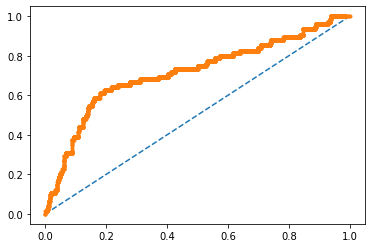

In [169]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(ytest, probs)

plt.plot([0, 1], [0, 1], linestyle='--')   #plt.plot(x, y)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

We are taking UCR_PART column as target and rest of them as predictors

In [146]:
x = df_final.drop(["UCR_PART", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9", "M10", "M11", "M12", "2016", "2017", "2018", "HOUR"], axis = 1)
y = df_final["UCR_PART"]

In [147]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 111)

In [148]:
model.fit(xtrain, ytrain)

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sony\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
predict = model.predict(xtest)

In [156]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [157]:
print(accuracy_score(ytest, predict))
print(classification_report(ytest, predict))
print(confusion_matrix(ytest, predict))

0.5218116251114816
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        88
           2       0.61      0.01      0.02      4669
           3       0.52      1.00      0.69     13426
           4       0.00      0.00      0.00      7595

    accuracy                           0.52     25789
   macro avg       0.23      0.20      0.14     25789
weighted avg       0.38      0.52      0.36     25789

[[    0     0     1    10     0]
 [    0     0     0    88     0]
 [    0     0    46  4623     0]
 [    0     0    15 13411     0]
 [    0     0    13  7582     0]]


C:\Users\sony\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
